In [19]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd
import json
import plotly.express as px
from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_regression
from formulaic import Formula
from sklearn.model_selection import KFold

In [20]:
datos_AMBA = pd.read_csv('sube-2023-regresion.csv')

In [21]:
datos_regresion = pd.read_csv('sube-2023-regresion.csv')

datos_ColectivoJN = datos_AMBA[(datos_regresion["TIPO_TRANSPORTE"] == "COLECTIVO") & (datos_regresion['AMBA'] == 'SI') & (datos_regresion["PROVINCIA"] == "JN") & (datos_regresion ['DATO_PRELIMINAR'] == 'NO')] # Filtro y excluir los datos

cols = datos_ColectivoJN["LINEA"].unique() #busco toda las lineas (sin repetidos)

pasajeros_por_linea = pd.DataFrame()#creo el data frame

pasajeros_por_linea = pd. DataFrame ()
for col in cols:
    datos_linea = datos_ColectivoJN [ datos_ColectivoJN .LINEA == col ][["DIA_TRANSPORTE", "CANTIDAD"]]
    datos_linea = datos_linea . set_index ("DIA_TRANSPORTE").rename(columns = {"CANTIDAD" : col })
    pasajeros_por_linea = pd.concat ([ pasajeros_por_linea , datos_linea ], axis = 1)

print(pasajeros_por_linea.head())



                BS_ASLINEA_123  BSAS_LINEA_002  BSAS_LINEA_009  \
DIA_TRANSPORTE                                                   
2023-01-01                1681            5670            5644   
2023-01-02                9440           21759           23284   
2023-01-04               10540           24755           25405   
2023-01-05               10408           25772           26489   
2023-01-06               10530           26021           26458   

                BSAS_LINEA_010  BSAS_LINEA_015  BSAS_LINEA_017  \
DIA_TRANSPORTE                                                   
2023-01-01                5177            9109            7013   
2023-01-02               21176           45269           29962   
2023-01-04               23806           52873           33659   
2023-01-05               24688           53436           35182   
2023-01-06               24167           53163           35212   

                BSAS_LINEA_019  BSAS_LINEA_020  BSAS_LINEA_021  \
DIA_TRAN

In [22]:
pasajeros_por_linea_2023 = pasajeros_por_linea.dropna(axis=1, how = 'any')
pasajeros_por_linea_2023.head()

,BS_ASLINEA_123,BSAS_LINEA_002,BSAS_LINEA_009,BSAS_LINEA_010,BSAS_LINEA_015,BSAS_LINEA_017,BSAS_LINEA_019,BSAS_LINEA_020,BSAS_LINEA_021,BSAS_LINEA_022,...,LINEA 4,LINEA 42,LINEA 44,LINEA 50,LINEA 6,LINEA 7,LINEA 76,LINEA 8,LINEA_099,LINEA_164_AMBA
DIA_TRANSPORTE,,,,,,,,,,,,,,,,,,,,,
2023-01-01,1681,5670,5644,5177,9109,7013,1604,2617,11235,2202,...,2942,4029,4649,4839,2449,2184,3797,5317,1882,3210
2023-01-02,9440,21759,23284,21176,45269,29962,13921,11934,55611,13823,...,15329,19072,20387,16221,10486,12774,17374,23250,10322,19362
2023-01-04,10540,24755,25405,23806,52873,33659,16172,13366,61721,16206,...,17836,21609,23595,18448,12193,13949,19860,26294,11981,21784
2023-01-05,10408,25772,26489,24688,53436,35182,16569,12929,62510,16863,...,18044,21993,23687,18481,12888,14668,21235,27216,11787,22972
2023-01-06,10530,26021,26458,24167,53163,35212,16459,12955,63528,16846,...,18122,22421,23731,19300,12703,14199,23472,27073,11567,23411


# ------------

/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_core/plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
/home/tobias/anaconda3/lib/python3.11/site-packages/seaborn/_core/plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


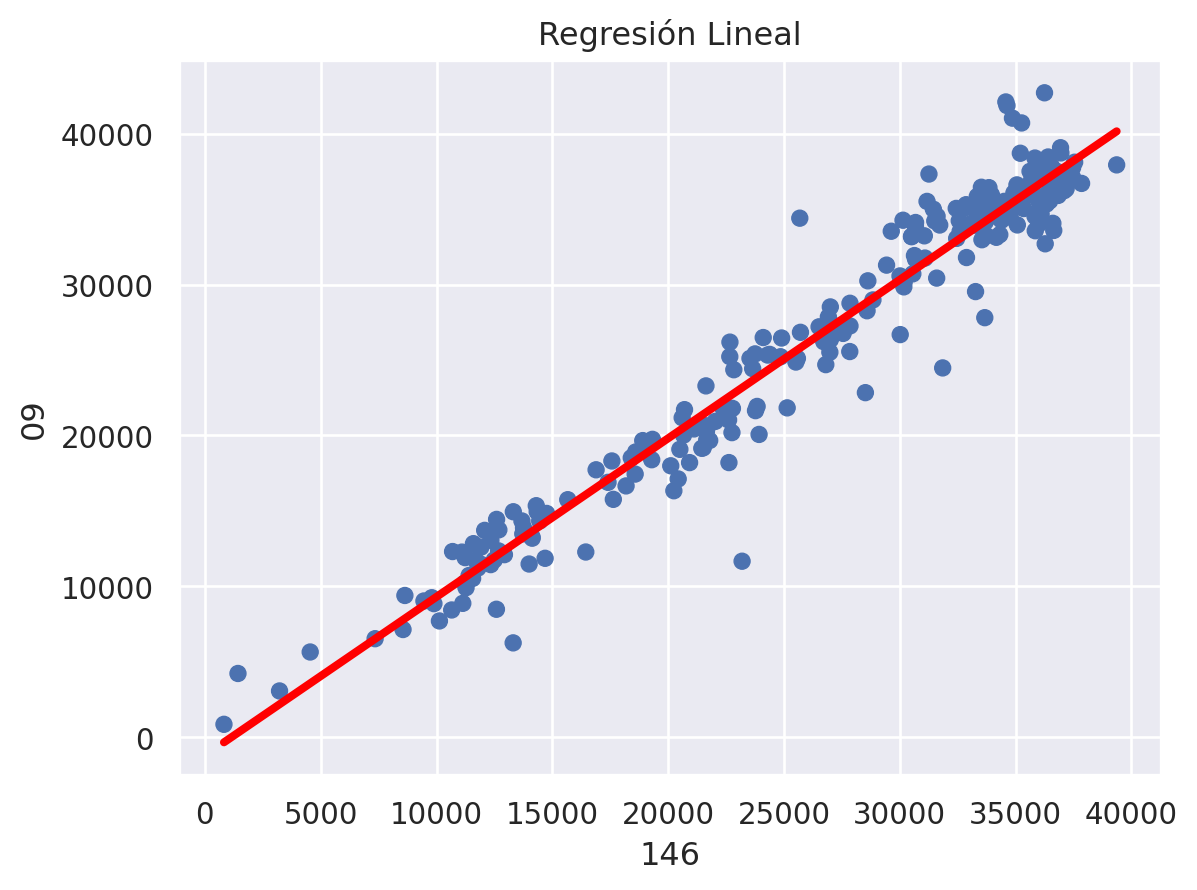

In [23]:
(
    so.Plot(data=pasajeros_por_linea_2023, x='BSAS_LINEA_146', y='BSAS_LINEA_009')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1))
    .label(title='Regresión Lineal', x='146', y='09')   
)

# Regresion Lineal

In [24]:
modelo = linear_model.LinearRegression()
modelo.fit(pasajeros_por_linea_2023[['BSAS_LINEA_146']], pasajeros_por_linea_2023[['BSAS_LINEA_009']])

beta_1 = modelo.coef_.item()  # la pendiente
beta_0 = modelo.intercept_.item()  

print('Beta_1: ', beta_1)
print('Beta_0: ', beta_0)

y_pred = modelo.predict(pasajeros_por_linea_2023[['BSAS_LINEA_146']])

r2 = r2_score(pasajeros_por_linea_2023[['BSAS_LINEA_009']], y_pred)
mse = mean_squared_error(pasajeros_por_linea_2023[['BSAS_LINEA_009']], y_pred)

print("R²:", r2)
print("MSE:", mse)

Beta_1:  1.0509409309293973
Beta_0:  -1208.4503187112678
R²: 0.9513709701074237
MSE: 4929180.41253799


Entonces, la recta que mejor aproxima a los datos es (redondeando):
$$ Y = -1208.45 + 1.05 X$$

### Regresion Lineal con datos de entrenamiento y de prueba.

In [25]:
X = pasajeros_por_linea_2023['BSAS_LINEA_146'].values.reshape(-1, 1) 
y = pasajeros_por_linea_2023['BSAS_LINEA_009'].values

# divido los datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modeloLineal = LinearRegression(fit_intercept=False)

# Entrenamos el modelo
modeloLineal.fit(X_train, y_train)

y_pred = modeloLineal.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)
print("RMSE", rmse)

MSE: 3788175.225623859
R²: 0.9604794455324918
RMSE 1946.323515149488


In [26]:
# Seleccionar la línea BSAS_LINEA_146 como predictor
X = pasajeros_por_linea_2023['BSAS_LINEA_024'].values.reshape(-1, 1)  # Asegúrate de que sea un array 2D

# Definir la variable objetivo
y = pasajeros_por_linea_2023['BSAS_LINEA_009'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)


MSE: 6089564.176975098
R²: 0.9364699523106412


In [27]:
# Seleccionar la línea BSAS_LINEA_146 como predictor
X = pasajeros_por_linea_2023['LINEA 7'].values.reshape(-1, 1)  # Asegúrate de que sea un array 2D

# Definir la variable objetivo
y = pasajeros_por_linea_2023['BSAS_LINEA_009'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)


MSE: 5454023.575030651
R²: 0.943100299504077


In [28]:
# Seleccionar la línea BSAS_LINEA_146 como predictor
X = pasajeros_por_linea_2023['LINEA 101'].values.reshape(-1, 1)  # Asegúrate de que sea un array 2D

# Definir la variable objetivo
y = pasajeros_por_linea_2023['BSAS_LINEA_009'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)


MSE: 5330149.461214792
R²: 0.9443926298136835


In [29]:
# Seleccionar la línea BSAS_LINEA_146 como predictor
X = pasajeros_por_linea_2023['LINEA 107'].values.reshape(-1, 1)  # Asegúrate de que sea un array 2D

# Definir la variable objetivo
y = pasajeros_por_linea_2023['BSAS_LINEA_009'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)


MSE: 6021059.054082678
R²: 0.9371846395358414


### regresion lienal con entrenamiento de datos y 5 lineas de colectivo

In [30]:
selected_lines = ['BSAS_LINEA_146', 'LINEA 101', 'LINEA 7', 'BSAS_LINEA_024']

X = pasajeros_por_linea_2023[selected_lines].values
y = pasajeros_por_linea_2023['BSAS_LINEA_009'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)
print("RMSE", rmse)

MSE: 3985786.177738464
R²: 0.9584178475515971
RMSE 1996.4433820518086


# ------------

## Regresión Ridge

### Refrescamos los resultados del modelo lineal: (una sola linea de colectivo)

* MSE:  3788175.225623859
* R²:   0.9604794455324918
* RMSE: 1946.323515149488

In [31]:
X = pasajeros_por_linea_2023['BSAS_LINEA_146'].values.reshape(-1, 1)  # Asegúrate de que sea un array 2D
y = pasajeros_por_linea_2023['BSAS_LINEA_009'].values

#separo los datos de entrenamineto y de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Ridge()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

"""
# evaluo el modelo lineal
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Regresión Lineal - MSE:", mse_linear, "R²:", r2_linear)
"""

# evaluo el modelo ridge
mse_ridge = mean_squared_error(y_test, y_pred)
r2_ridge = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Regresión Ridge, MSE:", mse_ridge)
print("Regresión Ridge,  R²:", r2_ridge)
print("Regresión Ridge, RMSE:", rmse)

Regresión Ridge, MSE: 3742972.035143765
Regresión Ridge,  R²: 0.9609510327862676
Regresión Ridge, RMSE: 1934.6762093807235


##### Como esperabamos, el RMSE se redució

#### Buscamos el hiperparámetro α:
# CHEQUEAR

In [32]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Definimos los posibles valores de alpha
alphas = np.array([0.01, 0.1, 0.5, 1, 2, 3])

# Preparar K-Fold Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in alphas:
    # Inicializamos un modelo de Regresion Ridge sin intercepto
    modeloRidge = Ridge(alpha=alpha, fit_intercept=False)
    rmse = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

    ind = 0

    # Realizamos validación cruzada
    for train_index, val_index in cv.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        modeloRidge.fit(X_train, y_train)

        y_pred = modeloRidge.predict(X_val)
        rmse[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
        ind += 1

    print(f"Para alpha = {alpha:.5f} la raíz del Error Cuadrático Medio es: {rmse.mean():.5f}")


Para alpha = 0.01000 la raíz del Error Cuadrático Medio es: 2228.68487
Para alpha = 0.10000 la raíz del Error Cuadrático Medio es: 2228.68487
Para alpha = 0.50000 la raíz del Error Cuadrático Medio es: 2228.68487
Para alpha = 1.00000 la raíz del Error Cuadrático Medio es: 2228.68487
Para alpha = 2.00000 la raíz del Error Cuadrático Medio es: 2228.68487
Para alpha = 3.00000 la raíz del Error Cuadrático Medio es: 2228.68487


In [33]:
# definimos los posibles valores 
alphas = np.array([0.01, 0.1, 0.5, 1, 2, 3])

ridge = Ridge(fit_intercept=False)

ridge_cv = GridSearchCV(ridge, param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')

# Ajustar el modelo usando la búsqueda en la rejilla
ridge_cv.fit(X_train, y_train)

# Obtener el mejor alpha
best_alpha = ridge_cv.best_params_['alpha']
print(f"Mejor alpha para Regresión Ridge: {best_alpha}")

# Entrenar el modelo de Regresión Ridge con el mejor alpha
modeloRidge = Ridge(alpha=best_alpha, fit_intercept=False)
modeloRidge.fit(X_train, y_train)

# Predecir y evaluar
y_pred_ridge = modeloRidge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"Raíz del Error Cuadrático Medio (Regresión Ridge): {rmse_ridge:.5f}")


Mejor alpha para Regresión Ridge: 3.0
Raíz del Error Cuadrático Medio (Regresión Ridge): 1940.43653


# parte final (ver que modelo es mejor)...REHACER BIEN

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Configurar el modelo de Regresión Lineal
linear_model = LinearRegression()

# Evaluar el modelo usando validación cruzada
linear_cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_linear_cv_score = linear_cv_scores.mean()
print("MSE promedio para Regresión Lineal:", -mean_linear_cv_score)

# Entrenar el modelo de Regresión Lineal
linear_model.fit(X_train, y_train)


MSE promedio para Regresión Lineal: 5172637.496574414


LinearRegression()

In [35]:
# Comparar los MSE de validación cruzada
mse_scores = {
    'Regresión Lineal': -mean_linear_cv_score,
    'Regresión Ridge': -ridge_cv.best_score_
}

best_model_name = min(mse_scores, key=mse_scores.get)
print("Mejor modelo:", best_model_name)


Mejor modelo: Regresión Ridge


In [36]:
if best_model_name == 'Regresión Lineal':
    beta_0 = model.intercept_
    betas = model.coef_
    print("Fórmula del modelo: y = {:.3f} + {:.3f}*X1 + {:.3f}*X2 + {:.3f}*X3 + {:.3f}*X4 + {:.3f}*X5".format(beta_0, *betas))

elif best_model_name == 'Regresión Ridge':
    beta_0 = best_ridge.intercept_
    betas = best_ridge.coef_
    print("Fórmula del modelo Ridge: y = {:.3f} + {:.3f}*X1 + {:.3f}*X2 + {:.3f}*X3 + {:.3f}*X4 + {:.3f}*X5".format(beta_0, *betas))


NameError: name 'best_ridge' is not defined

In [ ]:
# Crear y entrenar el modelo de Regresión Polinómica (grado 2)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_2 = LinearRegression()
model_2.fit(X_train_poly, y_train)

# Predecir y evaluar
y_pred_2 = model_2.predict(X_test_poly)
mse_2 = mean_squared_error(y_test, y_pred_2)
r2_2 = r2_score(y_test, y_pred_2)

print("Modelo 2 - Regresión Polinómica (grado 2)")
print("MSE:", mse_2)
print("R²:", r2_2)


Modelo 2 - Regresión Polinómica (grado 2)
MSE: 4586851.495980073
R²: 0.9550487943076833
